<a href="https://colab.research.google.com/github/chethanabhaskara/Early-diagonsis-of-Alzheimer-s-disease/blob/master/cross_sectional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sys 
old_stdout = sys.stdout 

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure as fig
%matplotlib inline

Using Cross Sectional Dataset for Training


In [0]:
sns.set()
df = pd.read_csv('https://raw.githubusercontent.com/chethanabhaskara/Early-diagonsis-of-Alzheimer-s-disease/master/oasis_cross-sectional.csv')
df.head()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN


In [0]:
# Since we're hoping for early diagnosis, we do not want to consider data from 
# subsequent visits. The 'Delay' column depicts the number of days between first
# subsequent visits. All rows with delay values greater than 0 are hence dropped.
df = df.loc[df['Delay'].isnull()]
df = df.reset_index(drop=True)
df = df.drop(['ID', 'Delay', 'Hand'], axis=1)
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) 
# include a new columns
group = df['CDR']
group = group.apply(lambda cdr: 1 if cdr>=0.5 else 0)
group_name = group.apply(lambda cdr: 'Demented' if cdr>=0.5 else 'Nondemented')
df['Group'] = group
df['Classification'] = group_name
df.head()

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group,Classification
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0,Nondemented
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0,Nondemented
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1,Demented
3,1,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,0,Nondemented
4,1,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,0,Nondemented


**Data Analytics with Cross Sectional MRI Data**

**Gender and Demented Rate**

Observation of Dementia statistics based on gender

Text(0.5, 1.0, 'Gender and Demented Rate')

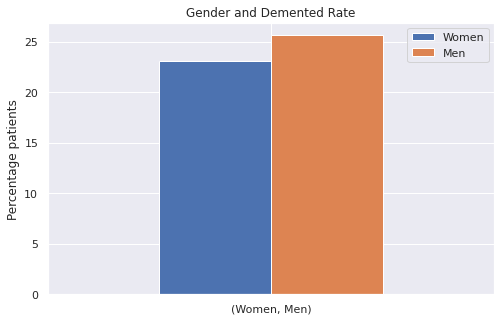

In [0]:
# Extracts countes of Demented Men and Women
demented = df[df['Group']==1]
demented_women = demented[demented['M/F']==0]['Group']
demented_women_count = demented_women.count()
demented_men = demented[demented['M/F']==1]['Group']
demented_men_count = demented_men.count()

# Extract counts of Non demented men and women
non_demented = df[df['Group']==0]
non_demented_women = non_demented[non_demented['M/F']==0]['Group']
non_demented_women_count = non_demented_women.count()
non_demented_men = non_demented[non_demented['M/F']==1]['Group']
non_demented_men_count = non_demented_men.count()

# Calculate Percentage
percent_demented_women = demented_women_count*100/(demented_women_count + non_demented_women_count)
percent_demented_men = demented_men_count*100/(demented_men_count + non_demented_men_count)

# Plot histogram of the same
df_bar = pd.DataFrame( {'Women': [percent_demented_women], 'Men': [percent_demented_men]} )
df_bar.index = [['Women'],['Men']]
df_bar.plot(kind='bar', figsize=(8,5))
plt.ylabel('Percentage patients')
plt.legend()
plt.xticks(rotation=0)
plt.title('Gender and Demented Rate')

In [0]:
# Configs for Seaborn graphs 
palette = {'color': ['g', 'r']} #for seaborn plots 

**Density plots for different parameters among Demented and NonDemented individuals**

Using density plots we can observe the patterns of features amming Demented and healthy individuals. For example - A higher density of Nondemented individuals are found to have MMSE above 25

1. **MMSE: Mini Mental State Examination**

Text(0.5, 0, 'MMSE')

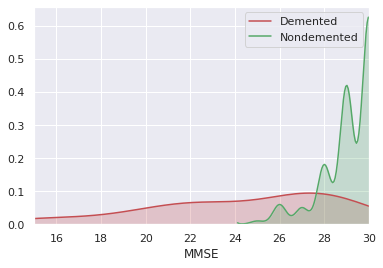

In [0]:
# a4_dims = (13, 3)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['MMSE'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['MMSE'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(15,30)
plt.xlabel('MMSE')

Observation: Non Demented individuals has MMSE ranging between 25 and 30 

**ASF(Atlas Scaling Factor)**

Text(0.5, 0, 'ASF')

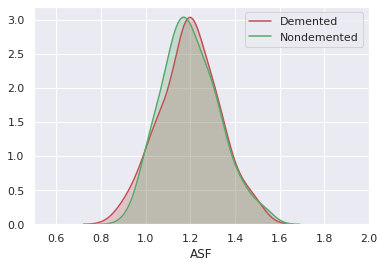

In [0]:
# a4_dims = (13, 3)
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['ASF'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['ASF'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(0.5, 2)
plt.xlabel('ASF')

Observation: Nothing can inferred from ASF

**eTIV - Estimated Total Intracranial Volume**


Text(0.5, 0, 'eTIV')

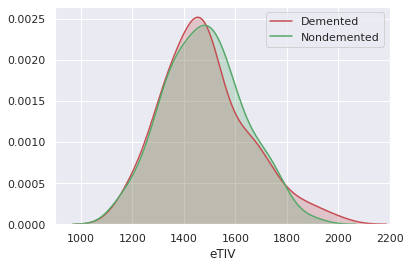

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['eTIV'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['eTIV'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(900, 2200)
plt.xlabel('eTIV')

Observation: Nothing significant can be observed from eTIV

**nWBV = Normalized Whole Brain Volume**

Text(0.5, 0, 'nWBV')

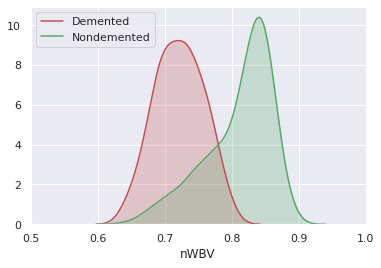

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['nWBV'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['nWBV'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlim(0.5, 1.0)
plt.xlabel('nWBV')

Observation - The nWBV appears to be lesser for Demented individuals and higher for non-demented individuals. However, there is also an overlap region

**Age**

Text(0.5, 0, 'Age')

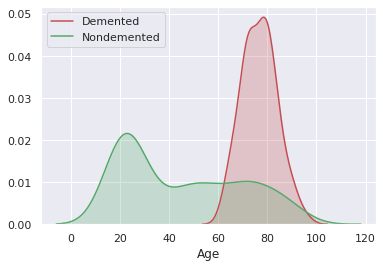

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['Age'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['Age'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlabel('Age')

In [0]:
Observation : A larger concentration of Demented individuals is found at around 80 years of age. This leads to the question, does dementia reduce the life span of an individual?

**Education**

Text(0.5, 0, 'Educ')

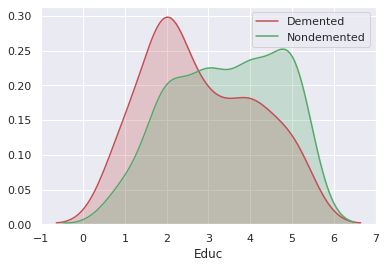

In [0]:
# fig, ax = plt.subplots(figsize=a4_dims)
sns.kdeplot(df['Educ'][df['Classification']=='Demented'], shade=True, legend=True, color="r", label='Demented')
sns.kdeplot(df['Educ'][df['Classification']=='Nondemented'], shade=True, legend=True, color="g", label='Nondemented')
plt.legend()
plt.xlabel('Educ')

Observation - A higher concentraition Dementia can be found to have lesser educational qualifications. 

# Data Preprocessing

**Get Stats on Missing values**

In [0]:
pd.isnull(df).sum() 

M/F                 0
Age                 0
Educ              181
SES               200
MMSE              181
CDR               181
eTIV                0
nWBV                0
ASF                 0
Group               0
Classification      0
dtype: int64

**Fill missing values with the median**

In [0]:
# Fill NA values

df = df.fillna(df.median(skipna=True))

In [0]:
pd.isnull(df).sum() 

M/F               0
Age               0
Educ              0
SES               0
MMSE              0
CDR               0
eTIV              0
nWBV              0
ASF               0
Group             0
Classification    0
dtype: int64

**Splitting the Data for Training and Testing**

In [0]:
# Splitting into Train/Test Data 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [0]:
Y = df['Group'].values # Target for the model
X = df[['M/F', 'Age', 'Educ', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Features we use

# splitting into three sets
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Feature scaling
# Using a MinMaxScaler, since we have a range of values for all our features. 
# Outliers are unlikely. 
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)


# Train Machine Learning Models

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [0]:
acc = [] # list to store all performance metric
max_test_auc=0
req_obj=None

**Decision Tree Classifier**

In [0]:
best_score = 0
kfolds = 5 

# Run Decision tree for different depth values of the tree and record the best
# Decision Tree model  
for md in range(1,9):
  treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, 
                                     criterion='gini')
  scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, 
                           cv=kfolds, scoring='accuracy')
  
  score = np.mean(scores)
  if score > best_score:
    best_score = score 
    optimal_depth = md 

# Fit a model using optimal parameters 
OptimalDecisionTree = DecisionTreeClassifier(
    max_depth=optimal_depth).fit(X_trainval_scaled, Y_trainval )

# Predict for test data, calculate score, recall, roc-auc 
test_score = OptimalDecisionTree.score(X_test_scaled, Y_test)
PredictedOutput = OptimalDecisionTree.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj =  OptimalDecisionTree
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", optimal_depth)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])    

Best accuracy on validation set is: 0.8941628264208908
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.9134615384615384
Test recall with best parameters is  0.8076923076923077
Test AUC with the best parameter is  0.8782051282051282


In [0]:
print("Feature Importance ")
np.array([X.columns.values.tolist(), list(OptimalDecisionTree.feature_importances_)]).T

Feature Importance 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['Educ', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U4')

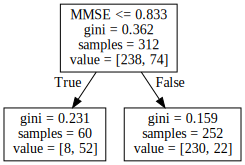

In [0]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(OptimalDecisionTree, 
                           feature_names=X_trainval.columns.values.tolist(),
                           out_file=None)
graph = graphviz.Source(dot_data)
graph 

**Random Forests Classifier**

In [0]:
best_score = 0
kfolds = 5

# Run Random forests for a range of parameters and record the best model 

for M in range(2, 20, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 10): # maximum depth of the tree
          for split_criterion in ['gini', 'entropy']:
            # train the model
            # n_jobs(4) is the number of parallel computing
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, criterion=split_criterion)
        
            # perform cross-validation
            scores = cross_val_score(forestModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if max(best_score, score) == score:
                best_score = score
                optimal_trees = M
                optimal_features = d
                optimal_depth = m
                optimal_criterion = split_criterion

# Fit a model using optimal parameters 
OptimalRandomForest = RandomForestClassifier(n_estimators=optimal_trees, 
                                         max_features=optimal_features,
                                         max_depth=optimal_depth, 
                                         random_state=0,
                                         criterion=optimal_criterion).fit(X_trainval_scaled, Y_trainval )

# Predict for test data, calculate score, recall, roc-auc 
PredictedOutput = OptimalRandomForest.predict(X_test_scaled)
test_score = OptimalRandomForest.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj =  OptimalRandomForest


# PredictedOutputRF=PredictedOutput
print("Best Score ", best_score)
print("Best parameters of max trees, max features, max depth are: ", 
      optimal_trees, optimal_features, optimal_depth)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)


m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

KeyboardInterrupt: ignored

**Logistic Regression**


In [0]:
best_score = 0 
kfolds = 5

# Run Logistic regression with different regularization values and record the 
# model with best score 

for c in [0.001, 0.1, 10, 100]: # Inverse of regulariztion strength, try for a range of values 
  logisticRegressionClassifier = LogisticRegression(C=c)
  scores = cross_val_score(logisticRegressionClassifier, X_trainval_scaled, Y_trainval, cv=kfolds,
                            scoring='accuracy')
  score=np.mean(scores)

  # Store the best Logistic regression parameters 
  if score > best_score:
    best_score = score 
    optimal_c = c    

# Fit a model using optimal parameters 
OptimalLogisticRegressionModel = LogisticRegression(C=optimal_c).fit(
    X_trainval_scaled, Y_trainval)

# Predict for test data, calculate score, recall, roc-auc 
test_score = OptimalLogisticRegressionModel.score(X_test_scaled, Y_test)
PredictedOutput = OptimalLogisticRegressionModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj =  OptimalLogisticRegressionModel
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", optimal_c)
print("Test accuracy with best regularization parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)

m = 'Logistic Regression'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8877624167946749
Best parameter for regularization (C) is:  100
Test accuracy with best regularization parameter is 0.9134615384615384
Test recall with the best C parameter is 0.7692307692307693
Test AUC with the best C parameter is 0.8653846153846153


**Support Vector Machines**

In [0]:
best_score = 0 

# Run SVM for different coefficent, gamma and kernel functions, and record the 
# model with best score. 

for coeff in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
  for gammaval in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for kernelfunc in ['rbf', 'linear', 'poly', 'sigmoid']:
      svmModel = SVC(kernel=kernelfunc, C=coeff, gamma=gammaval)
      scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, 
                               scoring='accuracy')
      score = np.mean(scores)
      if score > best_score:
        best_score = score 
        optimal_c = coeff 
        optimal_gamma = gammaval
        optimal_kernel = kernelfunc

# Fit a model using optimal parameters 
SelectedSVMmodel = SVC(C=optimal_c, 
                       gamma=optimal_gamma, 
                       kernel=optimal_kernel).fit(X_trainval_scaled, 
                                                    Y_trainval)
                       
                       
# Predict for test data, calculate score, recall, roc-auc 
test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj =  SelectedSVMmodel

print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", optimal_c)
print("Best parameter for gamma is: ", optimal_gamma)
print("Best parameter for kernel is: ", optimal_kernel)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test AUC with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])                             


Best accuracy on cross validation set is: 0.8909882232462877
Best parameter for c is:  1
Best parameter for gamma is:  0.001
Best parameter for kernel is:  linear
Test accuracy with the best parameters is 0.8942307692307693
Test recall with the best parameters is 0.6538461538461539
Test AUC with the best parameter is 0.814102564102564


#### KNN

In [0]:
best_score = 0

for n_neighbors in range(3, 10): # Iterate over different neighbors paramenter
    for algorithm in ['ball_tree', 'kd_tree', 'brute']: # Iterate over the different algorithms
            # Get the KNN Model
            knn = KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=algorithm)

            # perform cross-validation
            scores = cross_val_score(knn, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                optimal_n = n_neighbors
                optimal_alogrithm = algorithm

# Rebuild a model on the combined training and validation set        
SelectedKNNModel = KNeighborsClassifier(n_neighbors=optimal_n, algorithm=optimal_alogrithm)
SelectedKNNModel.fit(X_trainval_scaled, Y_trainval )

# Predict for test data, calculate score, recall, roc-auc 
PredictedOutput = SelectedKNNModel.predict(X_test_scaled)
test_score = SelectedKNNModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
if(test_auc>max_test_auc):
  max_test_auc = test_auc
  req_obj =  SelectedKNNModel
print("Best accuracy on validation set is:", best_score)
print("Best parameters of n_neighbors, algorithm are: ", optimal_n, optimal_alogrithm)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'KNN'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.8524833589349718
Best parameters of n_neighbors, algorithm are:  7 ball_tree
Test accuracy with the best parameters is 0.9038461538461539
Test recall with the best parameters is: 0.7692307692307693
Test AUC with the best parameters is: 0.8589743589743589


In [0]:
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Random Forest,0.913462,0.769231,0.865385
1,Logistic Regression with imputation),0.913462,0.769231,0.865385
2,SVM,0.894231,0.653846,0.814103
3,Decision Tree,0.913462,0.807692,0.878205
4,KNN,0.903846,0.769231,0.858974
